# 1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees

In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("D:\Entri\Python\Project\myexcel - myexcel.csv.csv")

# Replace "height" column values
df['height'] = np.random.randint(150, 181, size=len(df))

# Save the preprocessed dataset
df.to_csv('preprocessed_dataset.csv', index=False)


In [8]:
#Count the number of employees in each team and calculate the percentage split.
team_distribution = df['Team'].value_counts()
team_percentage = (team_distribution / len(df)) * 100


In [9]:
team_percentage

New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3.275109
Orlando Magic       

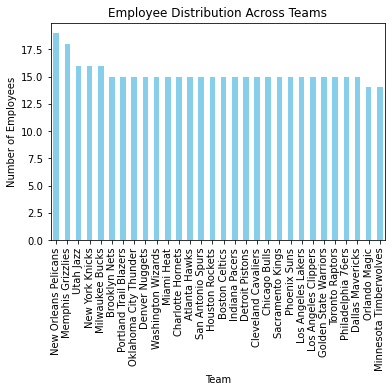

In [10]:
import matplotlib.pyplot as plt

# Bar chart for team distribution
team_distribution.plot(kind='bar', color='skyblue')
plt.title('Employee Distribution Across Teams')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.show()


# 2. Segregate employees based on their positions within the company.

In [12]:
position_distribution = df['Position'].value_counts()


In [13]:
position_distribution

SG    102
PF    100
PG     92
SF     85
C      79
Name: Position, dtype: int64

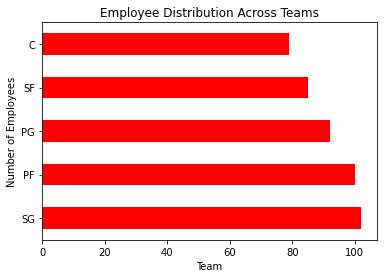

In [14]:
position_distribution.plot(kind='barh', color='Red')
plt.title('Employee Distribution Across Teams')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.show()


# 3. Identify the predominant age group among employees

In [19]:
df['age_group'] = pd.cut(df['Age'], bins=[10, 20, 30, 40], labels=['10-20', '21-30', '31-40'])
age_group_distribution = df['age_group'].value_counts()


In [20]:
age_group_distribution

21-30    346
31-40     91
10-20     21
Name: age_group, dtype: int64

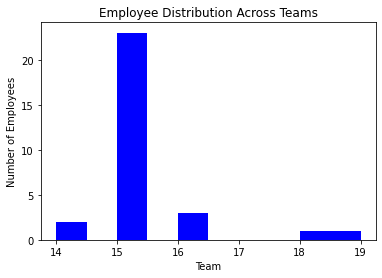

In [21]:

# Bar chart for team distribution
team_distribution.plot(kind='hist', color='blue')
plt.title('Employee Distribution Across Teams')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.show()


# 4. Highest Salary Expenditure by Team and Position

In [28]:
team_salary = df.groupby('Team')['Salary'].sum()
position_salary = df.groupby('Position')['Salary'].sum()
print(team_salary,position_salary)

Team
Atlanta Hawks              72902950.0
Boston Celtics             58541068.0
Brooklyn Nets              52528475.0
Charlotte Hornets          78340920.0
Chicago Bulls              86783378.0
Cleveland Cavaliers       106988689.0
Dallas Mavericks           71198732.0
Denver Nuggets             60121930.0
Detroit Pistons            67168263.0
Golden State Warriors      88868997.0
Houston Rockets            75283021.0
Indiana Pacers             66751826.0
Los Angeles Clippers       94854640.0
Los Angeles Lakers         71770431.0
Memphis Grizzlies          76550880.0
Miami Heat                 82515673.0
Milwaukee Bucks            69603517.0
Minnesota Timberwolves     59709697.0
New Orleans Pelicans       82750774.0
New York Knicks            73303898.0
Oklahoma City Thunder      93765298.0
Orlando Magic              60161470.0
Philadelphia 76ers         30992894.0
Phoenix Suns               63445135.0
Portland Trail Blazers     48301818.0
Sacramento Kings           71683666.0
San Ant

<ipython-input-37-0e0a00b45c9f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_salary, x='Team', y='Salary',palette='crest')


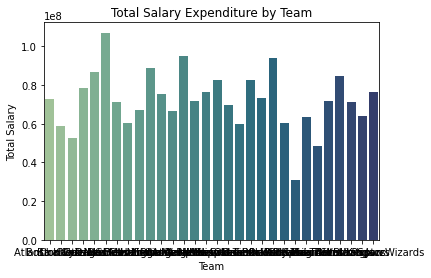

<ipython-input-37-0e0a00b45c9f>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=position_salary, x='Position', y='Salary',palette='magma')


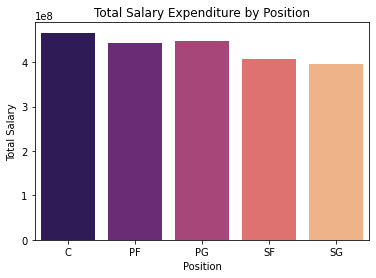

In [37]:
import seaborn as sns

# Group data by team and calculate total salary
team_salary = df.groupby('Team')['Salary'].sum().reset_index()

# Group data by position and calculate total salary
position_salary = df.groupby('Position')['Salary'].sum().reset_index()

# Plot salary expenditure by team

sns.barplot(data=team_salary, x='Team', y='Salary',palette='crest')
plt.title('Total Salary Expenditure by Team')
plt.xlabel('Team')
plt.ylabel('Total Salary')
plt.show()

# Plot salary expenditure by position

sns.barplot(data=position_salary, x='Position', y='Salary',palette='magma')
plt.title('Total Salary Expenditure by Position')
plt.xlabel('Position')
plt.ylabel('Total Salary')
plt.show()


# 5. Investigate if there's any correlation between age and salary, and represent it visually.


In [38]:
correlation = df[['Age', 'Salary']].corr()


In [39]:
correlation

,Age,Salary
Age,1.000000,0.214009
Salary,0.214009,1.000000


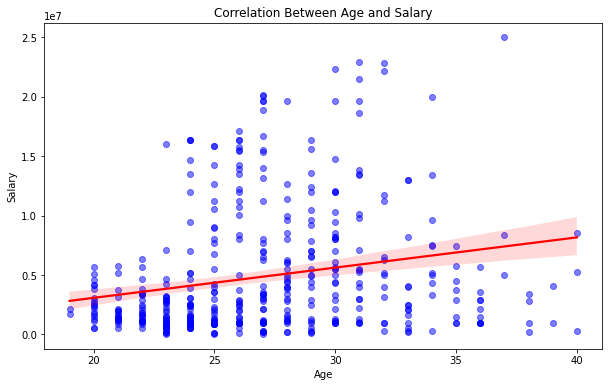

In [41]:
# Scatter plot for age vs salary with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Age', y='Salary', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, color='blue')
plt.title('Correlation Between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()
